In [158]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [159]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib
from scipy import stats
from scipy.stats import norm, skew
matplotlib.rc('figure', figsize = (20, 8))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')
import psycopg2
import csv

In [160]:
data=pd.read_csv('C:\\Users\\kikot\\OneDrive\\dash.csv')
data=data.fillna('noinfo')
data.drop(['User Id.1', 'Channel.1'], axis= 1 , inplace= True ) 
data

C:\Users\kikot\AppData\Local\Temp\ipykernel_23668\2361245814.py:1: DtypeWarning:

Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.



,dt,Channel,costs,User Id,Event Dt,Revenue,Region,Device,Session Start,Session End
0,2022-05-01,FaceBoom,113.3,188246423999.0,2022-05-01 23:09:52,4.99,Russia,iPhone,2022-05-01 02:36:01,2022-05-01 02:45:01
1,2022-05-02,FaceBoom,78.1,174361394180.0,2022-05-01 12:24:04,4.99,Russia,iPhone,2022-05-01 04:46:31,2022-05-01 04:47:35
2,2022-05-03,FaceBoom,85.8,529610067795.0,2022-05-01 11:34:04,4.99,Russia,Mac,2022-05-01 14:09:25,2022-05-01 15:32:08
3,2022-05-04,FaceBoom,136.4,319939546352.0,2022-05-01 15:34:40,4.99,Russia,Android,2022-05-01 00:29:59,2022-05-01 00:54:25
4,2022-05-05,FaceBoom,122.1,366000285810.0,2022-05-01 13:59:51,4.99,Russia,Mac,2022-05-01 03:33:35,2022-05-01 03:57:40
...,...,...,...,...,...,...,...,...,...,...
309896,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,Turkey,PC,2022-10-31 13:28:12,2022-10-31 14:39:29
309897,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,Thailand,PC,2022-10-31 22:14:52,2022-10-31 22:39:36
309898,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,China,PC,2022-10-31 01:40:48,2022-10-31 01:41:31
309899,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,China,Mac,2022-10-31 07:37:34,2022-10-31 07:37:55


In [161]:
data.to_csv("prob.csv", index=False)

In [162]:
df=pd.read_csv("C:\\Users\\kikot\\OneDrive\\Рабочий стол\\маркетинг\\prob.csv")
df

,dt,Channel,costs,User Id,Event Dt,Revenue,Region,Device,Session Start,Session End
0,2022-05-01,FaceBoom,113.3,188246423999.0,2022-05-01 23:09:52,4.99,Russia,iPhone,2022-05-01 02:36:01,2022-05-01 02:45:01
1,2022-05-02,FaceBoom,78.10000000000001,174361394180.0,2022-05-01 12:24:04,4.99,Russia,iPhone,2022-05-01 04:46:31,2022-05-01 04:47:35
2,2022-05-03,FaceBoom,85.80000000000001,529610067795.0,2022-05-01 11:34:04,4.99,Russia,Mac,2022-05-01 14:09:25,2022-05-01 15:32:08
3,2022-05-04,FaceBoom,136.4,319939546352.0,2022-05-01 15:34:40,4.99,Russia,Android,2022-05-01 00:29:59,2022-05-01 00:54:25
4,2022-05-05,FaceBoom,122.1,366000285810.0,2022-05-01 13:59:51,4.99,Russia,Mac,2022-05-01 03:33:35,2022-05-01 03:57:40
...,...,...,...,...,...,...,...,...,...,...
309896,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,Turkey,PC,2022-10-31 13:28:12,2022-10-31 14:39:29
309897,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,Thailand,PC,2022-10-31 22:14:52,2022-10-31 22:39:36
309898,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,China,PC,2022-10-31 01:40:48,2022-10-31 01:41:31
309899,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,China,Mac,2022-10-31 07:37:34,2022-10-31 07:37:55


In [163]:

conn = psycopg2.connect(dbname='data', user='postgres', 
                        password='486252522', host='localhost' , port = '5433')
cursor = conn.cursor()

cursor.execute("SELECT * FROM public.expenses")
results = cursor.fetchall()

df_ex = pd.DataFrame(results)

cursor = conn.cursor()
cursor.execute("SELECT * FROM public.order6")
results = cursor.fetchall()

df_or = pd.DataFrame(results)

cursor = conn.cursor()
cursor.execute("SELECT * FROM public.visitation")
results = cursor.fetchall()

df_vi = pd.DataFrame(results)

cursor = conn.cursor()
cursor.execute("SELECT * FROM public.merged_data")
results = cursor.fetchall()

merged_data = pd.DataFrame(results)
conn.close()

In [ ]:
df_ex.columns = ['dt', 'Channel', 'costs']
df_or.columns = ['User_Id' , 'Event_Dt','Revenue']
df_vi.columns = ['User_Id' , 'Region','Device','Channel','Session_Start','Session_End']


In [ ]:
app = dash.Dash(__name__)

diamonds = df_ex

scatter = px.scatter(
   data_frame=diamonds,
   x="Channel",
   y="costs",
   color="dt",
   title="Channel vs. costs",
   width=600,
   height=400,
)
histogram = px.histogram(
   data_frame=diamonds,
   x="costs",
   title="Histogram of costs",
   width=600,
   height=400,
)
violin = px.violin(
   data_frame=diamonds,
   x="dt",
   y="costs",
   title="dt vs. costs",
   width=600,
   height=400,
)

left_fig = html.Div(children=dcc.Graph(figure=scatter))
right_fig = html.Div(children=dcc.Graph(figure=histogram))

upper_div = html.Div([left_fig, right_fig], style={"display": "flex"})
central_div = html.Div(
   children=dcc.Graph(figure=violin),
   style={"display": "flex", "justify-content": "center"},
)
app.layout = html.Div([upper_div, central_div])

if __name__ == "__main__":
   app.run_server(debug=True)

# 2.3 Создание профилей пользователей

смотрю из каких стран приходят пользователи больше всего


In [ ]:
data['Region'].value_counts()

Region
Russia      207327
Turkey       36419
Thailand     35396
China        30759
Name: count, dtype: int64

из России приходит наибольшее количество пользователей 

вывожу по каким сайтам пришло больше всего людей

In [ ]:
data['Channel'].value_counts()

Channel
noinfo                308101
FaceBoom                 180
MediaTornado             180
RocketSuperAds           180
TipTop                   180
YRabbit                  180
AdNonSense               180
LeapBob                  180
OppleCreativeMedia       180
WahooNetBanner           180
lambdaMediaAds           180
Name: count, dtype: int64

могу выдели топ-3 сайта это : 

organic               107760

TipTop                 54794

FaceBoom               49022

смотрю каким девайсом пользуются большинство людей

In [ ]:
data['Device'].value_counts()

Device
iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: count, dtype: int64

пользователи больше всего пользуются iPhone

Используя ранее определенную функцию я построил набор данных с профилями
пользователей. Определил:
−
 Из каких стран приходят посетители. Какие страны дают больше всего
платящих пользователей.
−
 Какими устройствами они пользуются. С каких устройств чаще всего
заходят платящие пользователи.
По каким рекламным каналам шло привлечение пользователей. Какие каналы
приносят больше всего платящих пользователей.

# 2.4 Маркетинговый анализ

In [ ]:
expenses=pd.read_csv('C:\\Users\\kikot\\OneDrive\\Рабочий стол\\маркетинг\\expenses.csv')

In [ ]:
expenses.head()

,dt,Channel,costs
0,2022-05-01,MediaTornado,6.24
1,2022-05-02,MediaTornado,5.04
2,2022-05-03,MediaTornado,6.96
3,2022-05-04,MediaTornado,9.36
4,2022-05-05,MediaTornado,11.04


вывожу затраты за сайты

In [ ]:
channel_costs_report = pd.DataFrame()
channel_costs_report['costs'] = expenses.groupby('Channel')['costs'].sum()
channel_costs_report.sort_values(by='costs', ascending=False)#.style.format({'share': '{:.0f}%', 'payer_share': '{:.2f

,costs
Channel,
LeapBob,1616.16
OppleCreativeMedia,1421.25
RocketSuperAds,1224.34
lambdaMediaAds,1196.00
MediaTornado,954.48
YRabbit,928.62
AdNonSense,550.20
WahooNetBanner,292.20


In [ ]:
expenses['costs'].sum().round()

8183.0

105497.0 - Общая сумма расходов на маркетинг 


Больше всего было потрачено на маркетинг в каналах TipTop и FaceBoom. На них приходится больше 80% всех затрат.

In [ ]:
!pip install matplotlib

In [ ]:
from matplotlib import pyplot as plt

визуализирую затраты 

In [ ]:
expenses.head()

,dt,Channel,costs
0,2022-05-01,MediaTornado,6.24
1,2022-05-02,MediaTornado,5.04
2,2022-05-03,MediaTornado,6.96
3,2022-05-04,MediaTornado,9.36
4,2022-05-05,MediaTornado,11.04


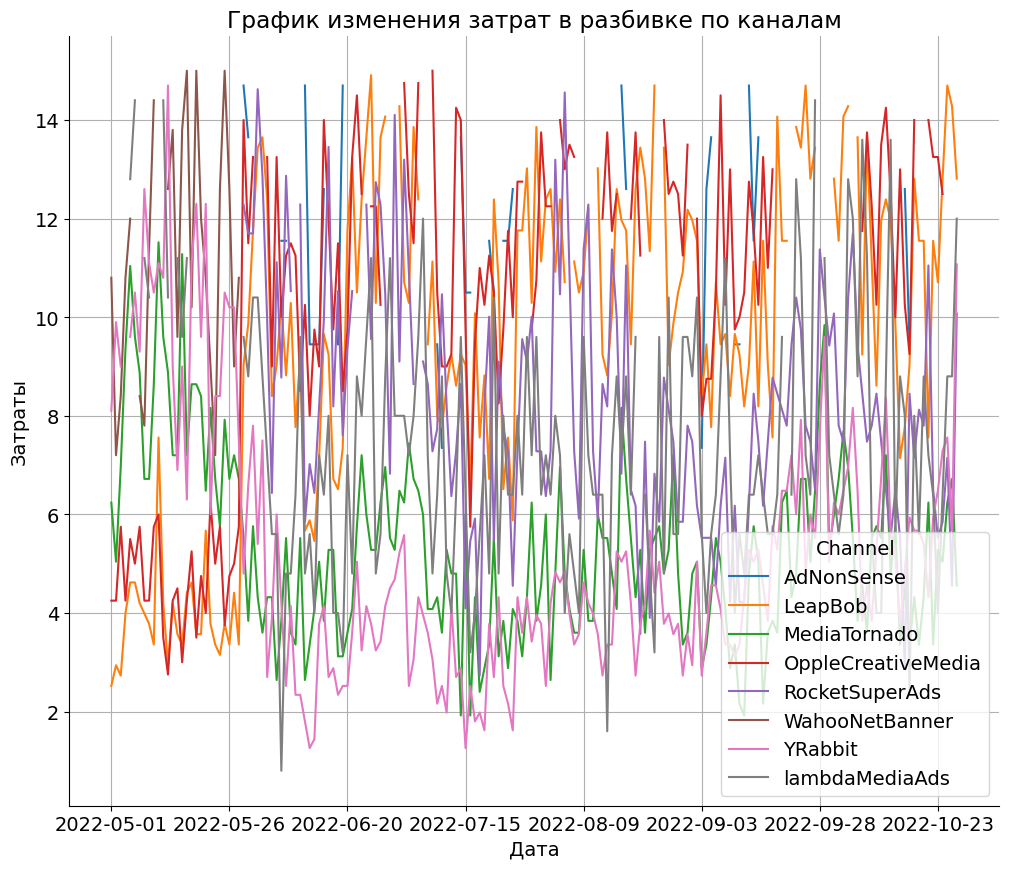

In [ ]:
filtered_data = expenses.pivot_table(
        index='dt', columns='Channel', values='costs'
    )
filtered_data.plot(                                             
           figsize=(12, 10),
           grid=True,)

plt.title('График изменения затрат в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Можно сделать вывод, что затраты на маркетинг со временем возрастали только на двух каналах: TipTop и FaceBoom

In [ ]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

в ходе этого модуля я определил сколько денег потратили вообщем  и визуализировал затраты сайта 